# Name: Lubanga Derrick

## 1 Diwali Sales Analysis using Python and Pandas


I worked on a practical project focusing on a Diwali sales dataset. This project taught me how to
use Python and Pandas for data analysis.<br>
The objective of this project is: 
1. Improve customer experienece by analyzing data 
2. Increase revenue
By scrutinizing the dataset, I endeavored to uncover patterns, preferences, and trends that would
lead to an improved understanding of customer behavior. This, in turn, would aid in tailoring
strategies to heighten customer satisfaction and optimize revenue generation. Through this practical
exercise, I honed my data analysis skills while simultaneously contributing to the goals of enhancing
customer engagement and driving financial success

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #For visualizing Data
%matplotlib inline
import seaborn as sns #For charts and visualization

In [36]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
df.shape


(11251, 15)

In [37]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [39]:
# Drop Blank or unnamed column
df.drop(['Status', 'unnamed1'], axis= 1, inplace= True)

In [40]:
#Check for Null Values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [41]:
#Delete the NULL values
df.dropna(inplace= True)

In [42]:
df.shape

(11239, 13)

In [43]:
 #Change Data Type
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtype


dtype('int64')

In [44]:
#Check all the columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [45]:
df[['Amount']].describe()

,Amount
count,11239.000000
mean,9453.610553
std,5222.355168
min,188.000000
25%,5443.000000
50%,8109.000000
75%,12675.000000
max,23952.000000


## 2 Exploratory Data Analysis

2.0.1 Gender

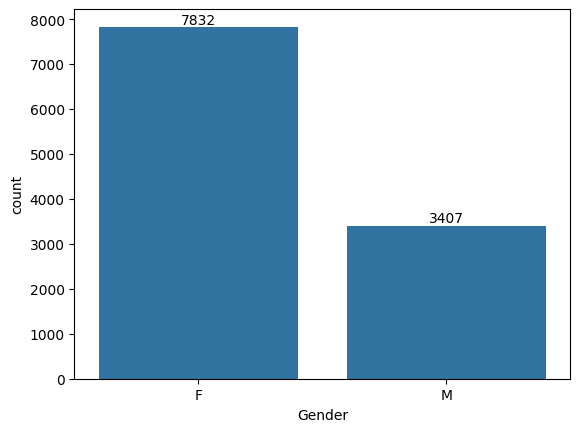

In [12]:
ax = sns.countplot (x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
import plotly.express as px
sales_gen = df.groupby(['Gender'], as_index= False) ['Amount'].sum()
fig = px.bar(sales_gen, x='Gender', y='Amount', 
             labels={'Amount': 'Total Sales', 'Gender': 'Gender'}, 
             title='Total Sales by Gender')

# Add text on the bars for exact values
fig.update_traces(text=sales_gen['Amount'], textposition='outside')

fig.show()


The graph visually depicts a noteworthy observation: a majority of buyers are identified as female,
and their purchasing influence surpasses that of male buyers.

2.0.2 Age Group

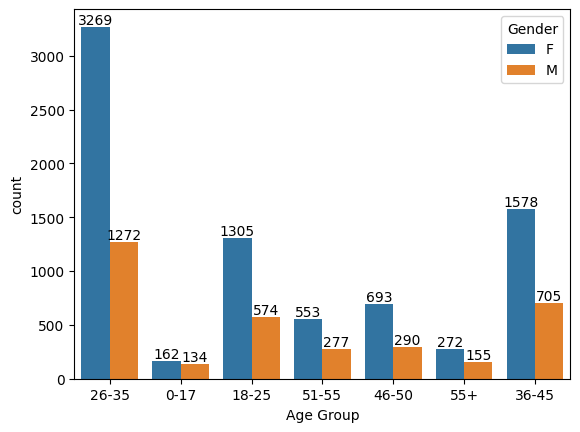

In [17]:
ax = sns.countplot(data= df, x = 'Age Group', hue= 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

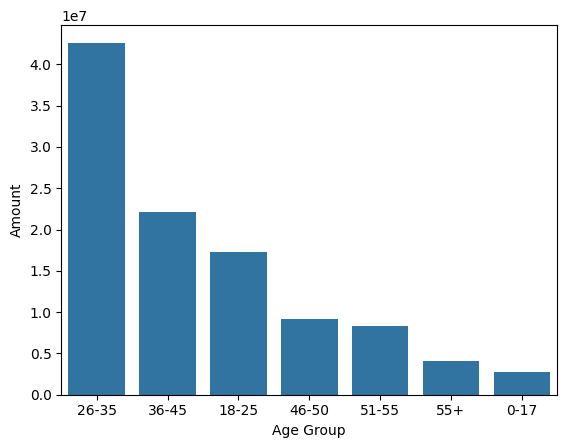

In [21]:
# Total Amount vs age group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)


The chart indicates a predominant female presence among buyers, particularly within the age
bracket of 26 to 35 years.


<Axes: xlabel='State', ylabel='Amount'>

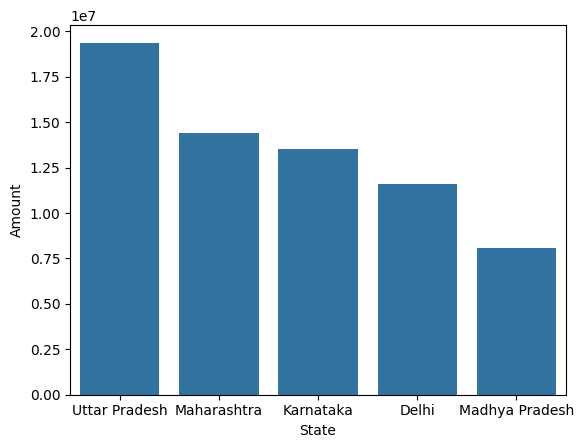

In [24]:
# Total amount of sales from states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum() \
    .sort_values(by='Amount', ascending=False).head(5)
sns.barplot(data=sales_state, x='State', y='Amount')


The preceding graphs focus on the top 10 states. It’s evident from these graphs that a significant
portion of orders originates from Uttar Pradesh, followed by Maharashtra and Karnataka in terms
of order volume.

2.0.4 Gender by Marital Status


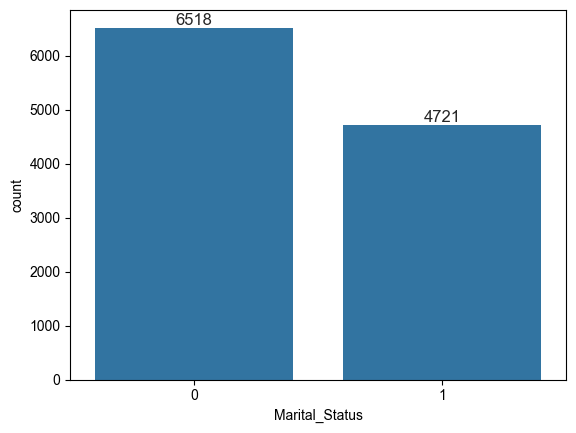

In [25]:
ax = sns.countplot(data=df, x= 'Marital_Status')
sns.set(rc = {'figure.figsize': (6,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

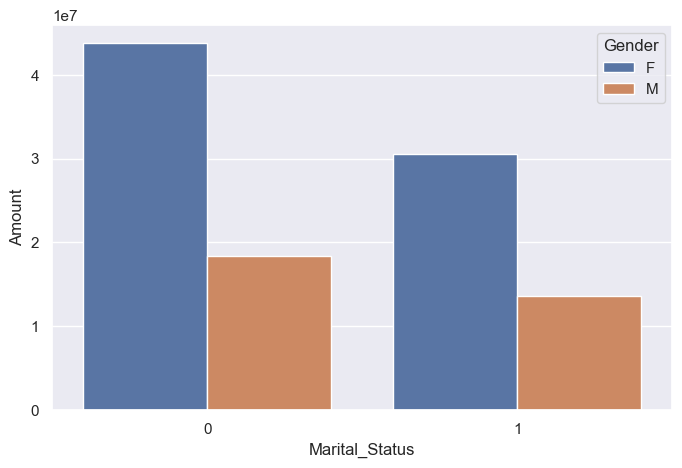

In [26]:
# Grouping by Marital Status and Gender, then summing Amount, sorting and plotting
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum() \
    .sort_values(by='Amount', ascending=False)

# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (8,5)})

# Creating a barplot with a hue to distinguish between Genders
sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')


The provided graphs illustrate that a considerable number of buyers are married women, and this
demographic exhibits substantial purchasing power

2.0.5 Occupation


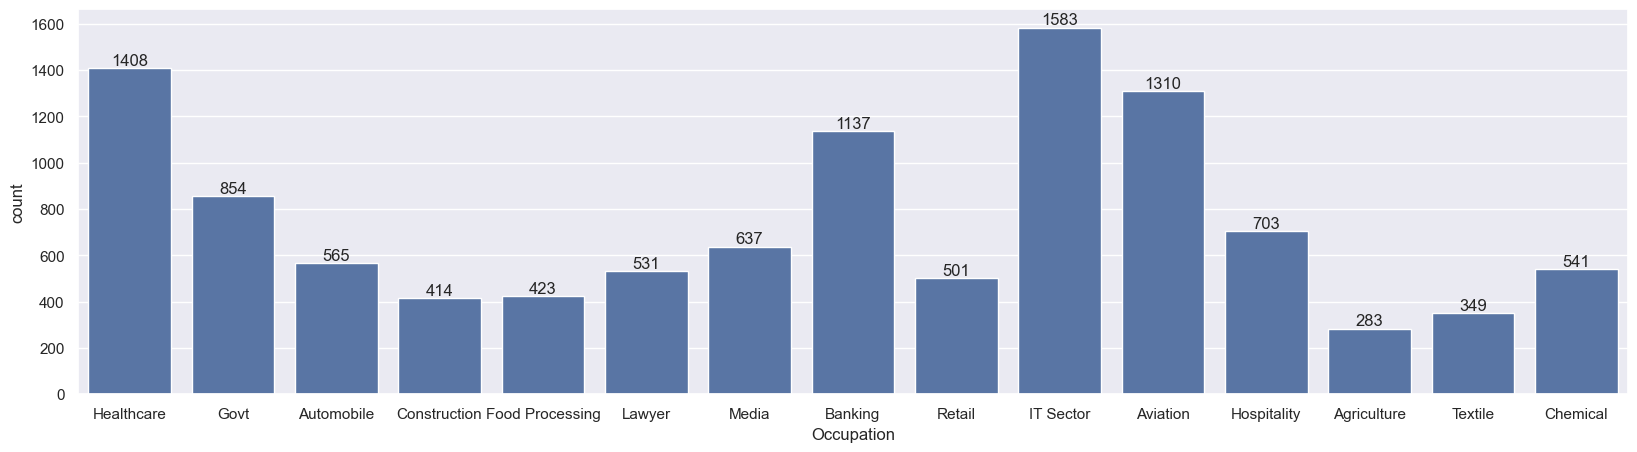

In [27]:
sns.set(rc = {'figure.figsize': (20,5)})
ax = sns.countplot(data= df, x = 'Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

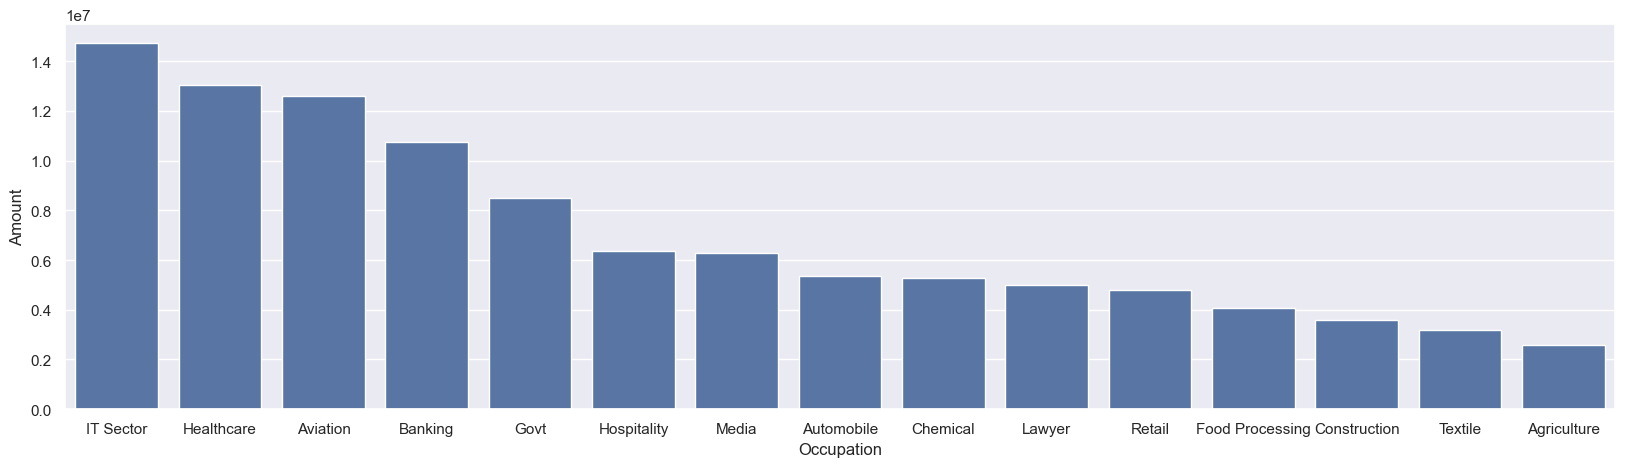

In [31]:
# Grouping by Occupation, summing Amount, sorting, and plotting
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum() \
    .sort_values(by='Amount', ascending=False)

# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (20,5)})

# Creating a barplot to visualize the total Amount by Occupation
sns.barplot(data=sales_state, x='Occupation', y='Amount')


The aforementioned graphs reveal that a substantial portion of buyers are employed in the IT,
Healthcare, and Aviation sectors.


2.0.6 Product Category


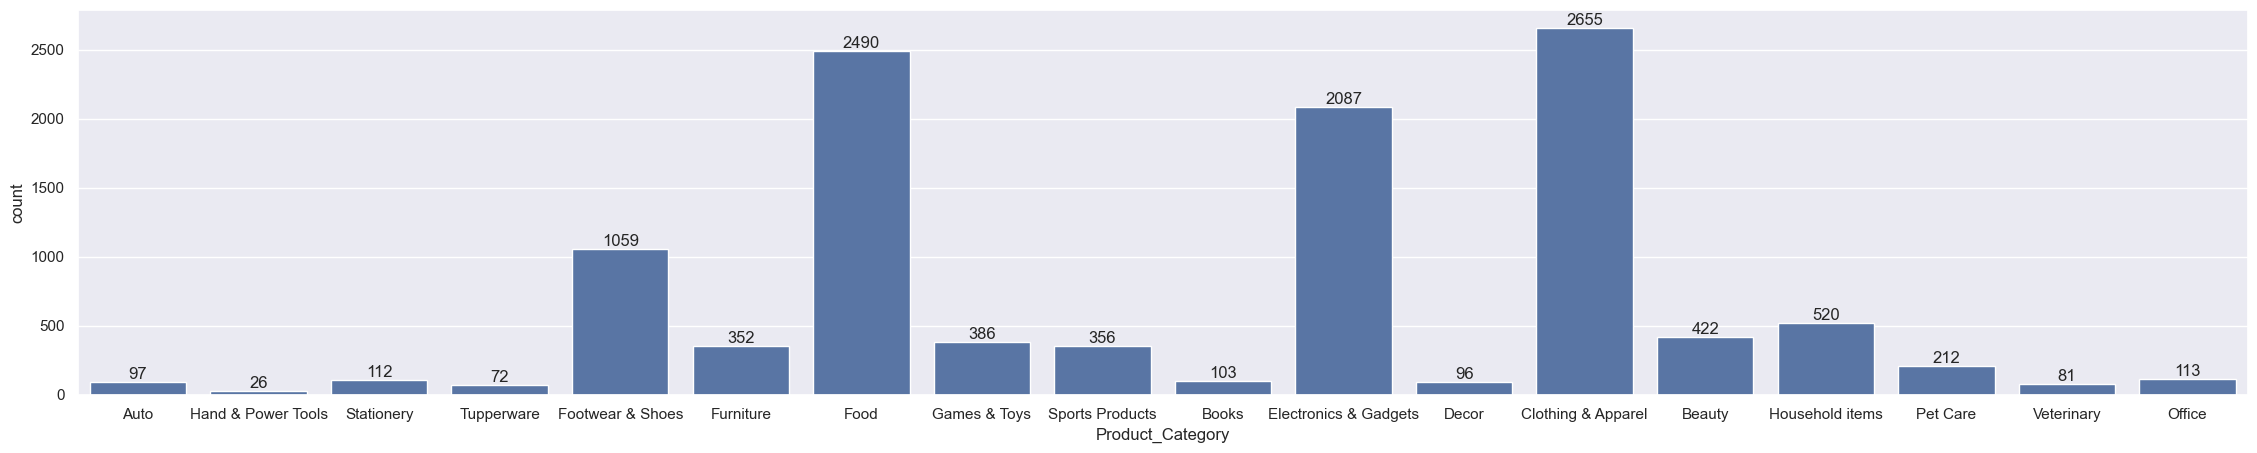

In [32]:
sns.set(rc={'figure.figsize':(28,5)})
ax = sns.countplot(data = df, x = 'Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Product_Category', ylabel='Amount'>

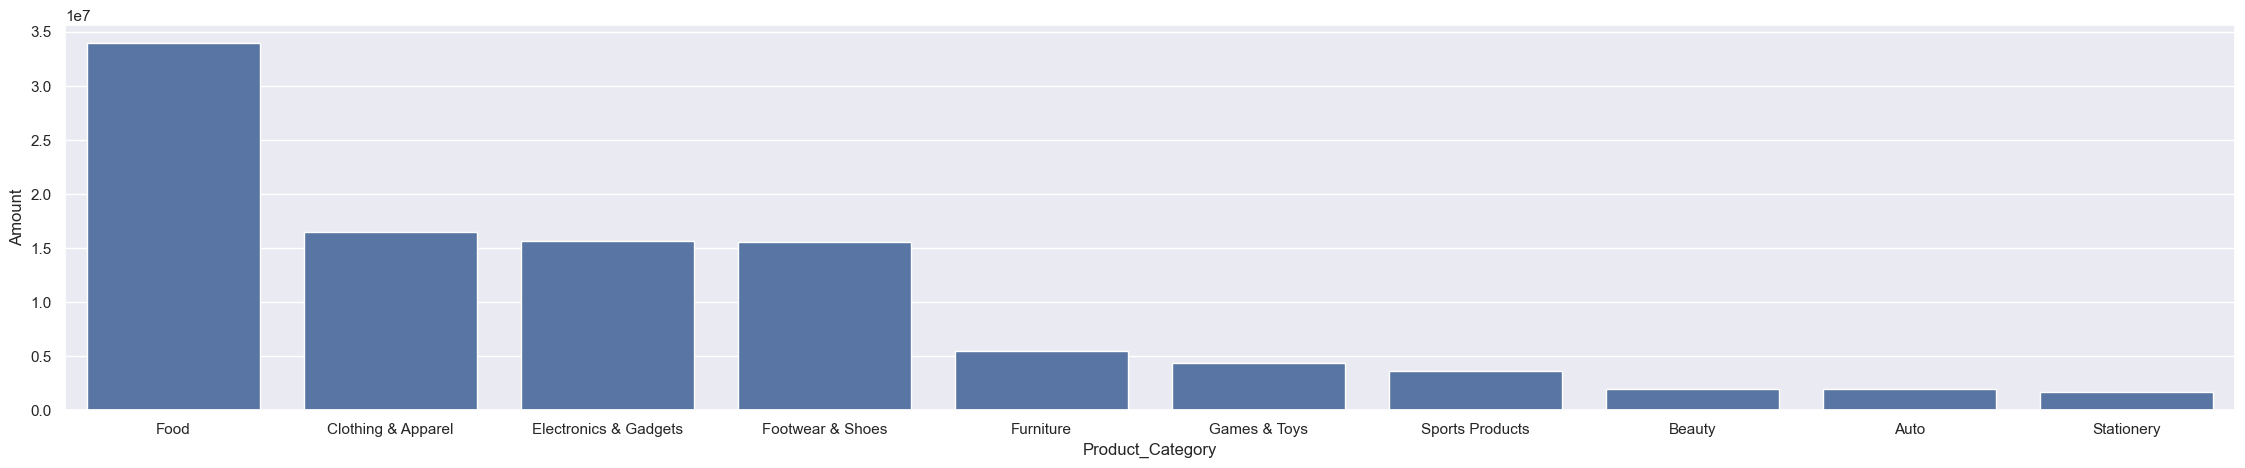

In [33]:
# Grouping by Product Category, summing Amount, sorting in descending order, and displaying the top 10
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum() \
    .sort_values(by='Amount', ascending=False).head(10)

# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (28,5)})

# Creating a barplot to visualize the total Amount by Product Category
sns.barplot(data=sales_state, x='Product_Category', y='Amount')


<Axes: xlabel='Product_ID', ylabel='Orders'>

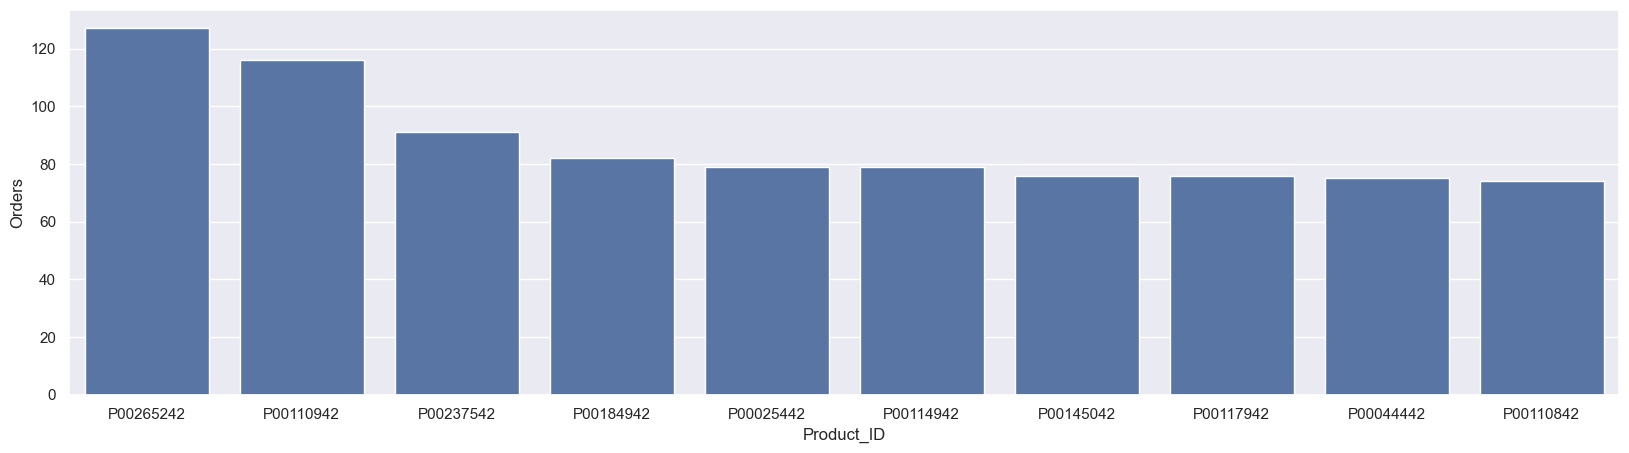

In [34]:
# Grouping by Product ID, summing Orders, sorting in descending order, and displaying the top 10
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum() \
    .sort_values(by='Orders', ascending=False).head(10)

# Setting the figure size for the plot
sns.set(rc={'figure.figsize': (20,5)})

# Creating a barplot to visualize the total Orders by Product ID
sns.barplot(data=sales_state, x='Product_ID', y='Orders')


2.1 Conclusion

The Diwali Sales Analysis project provided valuable insights into customer behavior and sales trends using Python and Pandas. Here are the key insights derived from the analysis:

1. **Customer Demographics and Behavior**:
   - **Gender and Spending**: Women emerged as the primary purchasers, spending more than their male counterparts, highlighting the importance of tailoring marketing strategies to appeal to female consumers.
   - **Age Group Preferences**: The 26-35 age group, especially among women, was the most active, suggesting this demographic is a crucial target for marketing campaigns during Diwali.

2. **Geographic Trends**:
   - **State-wise Sales**: Uttar Pradesh, Maharashtra, and Karnataka were the top states in terms of order volume and sales amount. This indicates regions where marketing and stock should be intensified during the festive season.

3. **Marital Status and Consumption**:
   - **Marital Status Impact**: Married individuals, particularly women, demonstrated significant purchasing power. This could influence marketing messages and product offerings to cater specifically to married couples or families.

4. **Occupational Influence**:
   - **Occupation and Purchasing Power**: Individuals in the IT, Healthcare, and Aviation sectors showed higher spending habits. Tailored promotions targeting these professions could be beneficial.

5. **Product Popularity and Sales**:
   - **Product Categories**: Food, Clothing, and Electronics were the most popular categories. Stocking up more on these products and creating targeted promotions could enhance sales in these segments.
   - **Specific Products**: Some products consistently outperformed others in terms of orders, which could guide inventory and promotional strategies.

6. **Sales Optimization Strategies**:
   - **Enhanced Customer Experience**: Understanding customer preferences helps in improving service and customer satisfaction, which can lead to increased sales and customer loyalty.
   - **Revenue Increase**: By aligning sales strategies with the insights on demographics, product preferences, and geographic sales distribution, businesses can optimize their revenue during festive seasons like Diwali.

These insights not only refine the sales approach for future Diwali seasons but also provide a template for analyzing customer behavior during other key shopping periods.